In [20]:
#importing Libraries
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [21]:
#Exract filenames from folder

In [22]:
filenames=[]
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    
  

In [23]:
len(filenames)

44441

In [24]:
#importing resnet50 model and configuation

In [25]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False
model=tf.keras.models.Sequential(
    [model,GlobalMaxPool2D()]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
#Extacting Features from image
img=image.load_img('1163.jpg',target_size=(224,224))
img_array=image.img_to_array(img)
img_expand_dim=np.expand_dims(img_array,axis=0)
img_preprocess=preprocess_input(img_expand_dim)
result=model.predict(img_preprocess).flatten()
norm_result=result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([0.00491874, 0.05812979, 0.00543876, ..., 0.00351524, 0.05245368,
       0.03639518], dtype=float32)

In [27]:
result

array([ 1.6351608, 19.324389 ,  1.8080341, ...,  1.1685884, 17.437449 ,
       12.099037 ], dtype=float32)

In [28]:
def extract_features_from_images(image_path,model):
    img=image.load_img(image_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_expand_dim=np.expand_dims(img_array,axis=0)
    img_preprocess=preprocess_input(img_expand_dim)
    result=model.predict(img_preprocess).flatten()
    norm_result=result/norm(result)
    return norm_result

In [29]:
extract_features_from_images(filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([0.        , 0.01761624, 0.00171601, ..., 0.0124723 , 0.02726393,
       0.06899243], dtype=float32)

In [59]:
image_features=[]
for file in filenames:
    image_features.append(extract_features_from_images(file,model))
    image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


KeyboardInterrupt: 

In [60]:
Image_features=pkl.dump(image_features,open('Image_features.pkl','wb'))
filenames=pkl.dump(filenames,open('filenames.pkl','wb'))

In [61]:
#loading Pickle Files

In [62]:
Image_features=pkl.load(open('Image_features.pkl','rb'))
filenames=pkl.load(open('filenames.pkl','rb'))

In [63]:
np.array(Image_features).shape

(544, 2048)

In [64]:
# Finding Similar Images

In [65]:
neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [66]:
input_image=extract_features_from_images('1163.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [67]:
distance,indices=neighbors.kneighbors([input_image])

In [68]:
indices[0]

array([ 22, 504,   5,  13,  25, 505], dtype=int64)

In [69]:
from IPython.display import Image

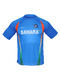

In [70]:
Image('1163.jpg')

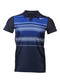

In [71]:
Image(filenames[indices[0][0]])

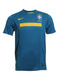

In [72]:
Image(filenames[indices[0][1]])

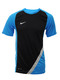

In [73]:
Image(filenames[indices[0][2]])

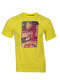

In [74]:
Image(filenames[indices[0][3]])

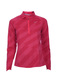

In [75]:
Image(filenames[indices[0][4]])

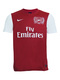

In [76]:
Image(filenames[indices[0][5]])